In [5]:
from fastai.vision.all import *

In [6]:
path = Path('Dataset/asl_alphabet_train/asl_alphabet_train')

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224), 
    batch_tfms=aug_transforms() 
)

dls = dblock.dataloaders(path)

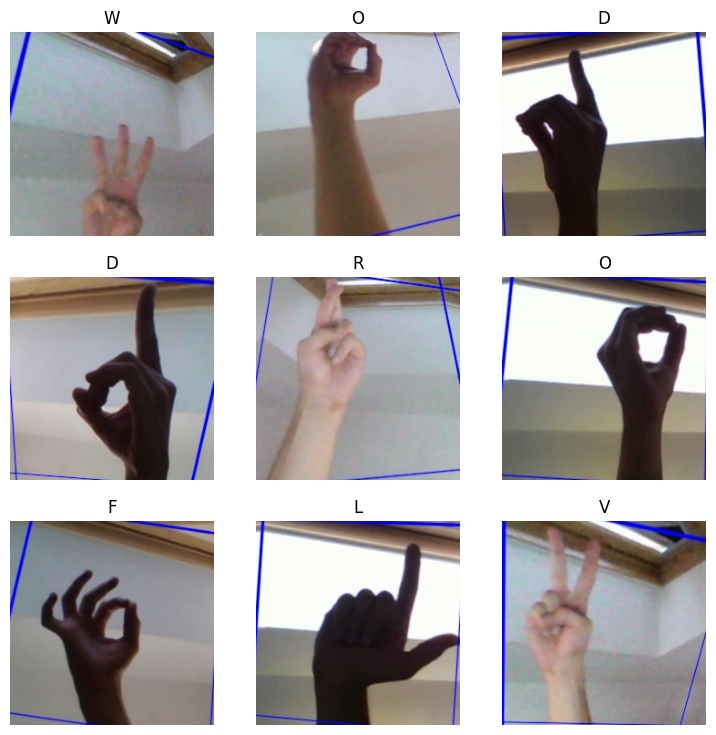

In [7]:
dls.show_batch(max_n=9)

In [8]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

In [9]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.170746,0.051974,0.981897,05:46


epoch,train_loss,valid_loss,accuracy,time
0,0.045216,0.006418,0.997816,07:57
1,0.014634,0.002293,0.999138,07:56
2,0.002782,0.000630,0.999828,07:55
3,0.002025,0.000037,1.000000,07:59


In [ ]:
learn.show_results()

In [10]:
learn.export('./models/sign_language_model_v1.pkl')